Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

### Importing modules
 
Create the basic setup, load the dataset and separate the variables.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(font_scale=.8, rc={'figure.figsize': (12, 12,)})
D = load_iris()
X = D.data
y = D.target
features = D.feature_names
df = pd.DataFrame(data=X, columns=features)

### Some facts 

We have:
* 150 measurement
* Features
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
* Classes
    - Iris-Setosa
    - Iris-Versicolour
    - Iris-Virginica

## Visualization

Now I try to find the best two features where the three classes can be separated clearly with bare eye.

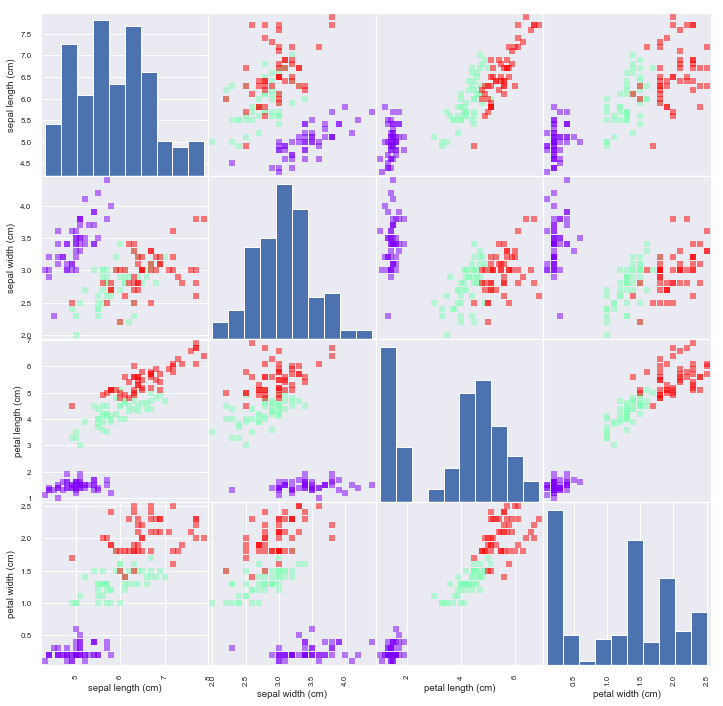

In [3]:
pd.plotting.scatter_matrix(df, c=y, marker='s', cmap='rainbow', grid=False);plt.show()

Let's see the correlation between the features.

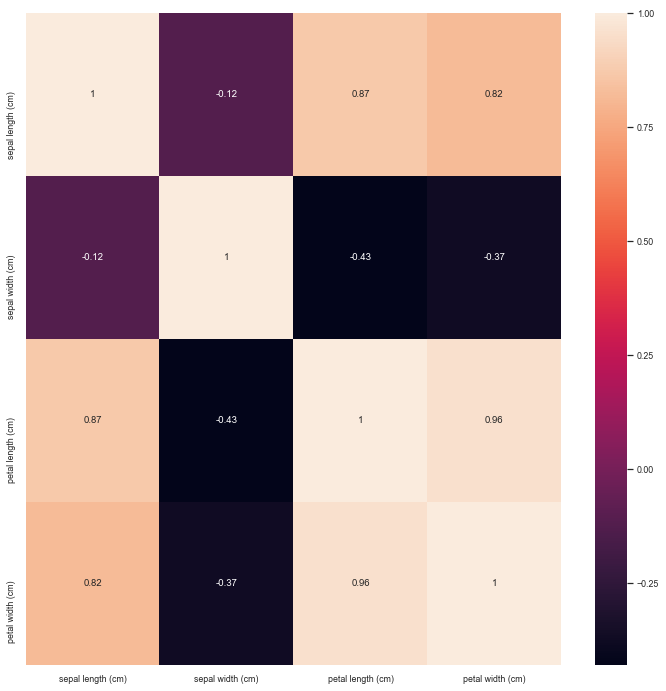

In [4]:
sns.heatmap(df.corr().round(2), annot=True);plt.show()

So, from these plots, my deduction is that the best two feature is the "Petal Width" and "Petal Length" to distinguish the classes from each other.

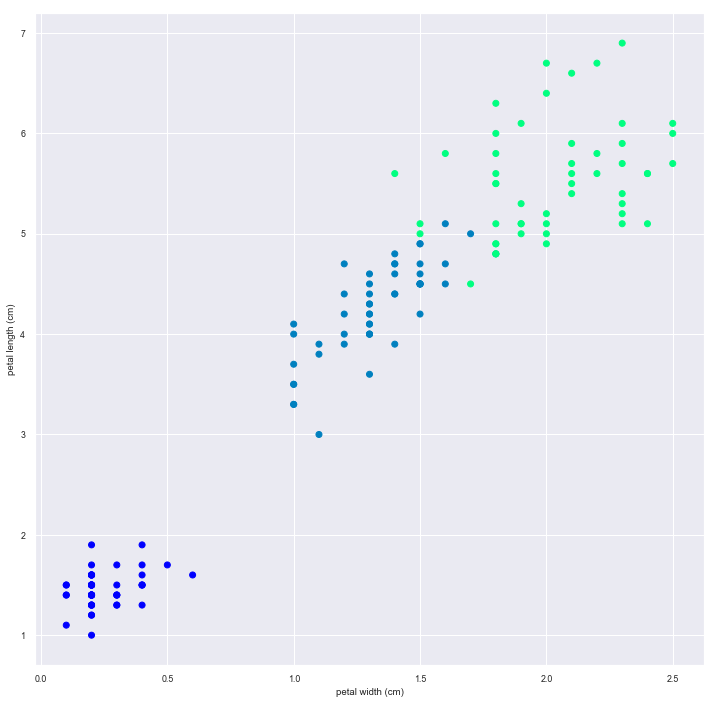

In [5]:
plt.scatter(df['petal width (cm)'], df['petal length (cm)'], c=y, cmap='winter');
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

First randomly select the train and test datapoints.

In [7]:
X = np.c_[df['petal width (cm)'].values, df['petal length (cm)'].values]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, shuffle=True)

Let's normalize the datapoints

In [8]:
scaler = MinMaxScaler()

X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)
X_processed = scaler.transform(X)

Use one-hot encoding on the target values

In [9]:
encoder = OneHotEncoder()

y_train_processed = encoder.fit_transform(y_train.reshape(-1,1)).todense()
y_test_processed = encoder.transform(y_test.reshape(-1,1)).todense()
y_processed = encoder.transform(y.reshape(-1,1)).todense()

def decode(x):
    global encoder
    return encoder.inverse_transform(x).reshape(-1,1)

## Selecting the right model

As a model I think that the K-Nearest Neighbors classifier is suitable for our classification problem. 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

To see what is the difference between a model who got preprocessed variables as input and the other who got raw variables, I make 2 classifier.

This is model is working with unprocessed data.

In [11]:
_knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
_knn.fit(X_train, y_train)

print('Accuracy on train:', np.mean(cross_val_score(_knn, X_train, y_train, cv=5)))
print('Accuracy on test:', np.mean(cross_val_score(_knn, X_test, y_test, cv=5)))

Accuracy on train: 0.9331515151515152
Accuracy on test: 0.96


This is model is working with preprocessed data.

In [12]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
knn.fit(X_train_processed, y_train_processed)

print('Accuracy on train:', np.mean(cross_val_score(_knn, X_train_processed, y_train_processed, cv=5)))
print('Accuracy on test:', np.mean(cross_val_score(_knn, X_test_processed, y_test_processed, cv=5)))

Accuracy on train: 0.95
Accuracy on test: 0.9333333333333333


### Visualize the results

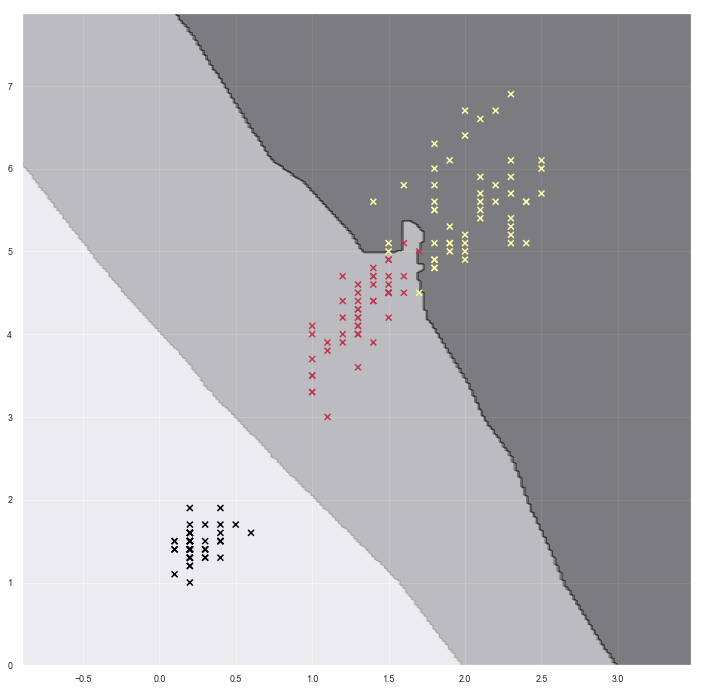

In [13]:
# X = np.c_[df['sepal length (cm)'].values, df['petal length (cm)'].values]
xx_min, xx_max = X[:, 0].min() - 1, X[:, 0].max() + 1
yy_min, yy_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xx_min, xx_max, .02), np.arange(yy_min, yy_max, .02))

plane = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
plane = decode(plane).reshape(xx.shape)

plt.contourf(xx, yy, plane, cmap='binary', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='inferno', marker='x')
plt.show()

### Trying out other classifier models

Accuracy on train: 0.9257921617677715
Accuracy on test: 0.8622895622895622


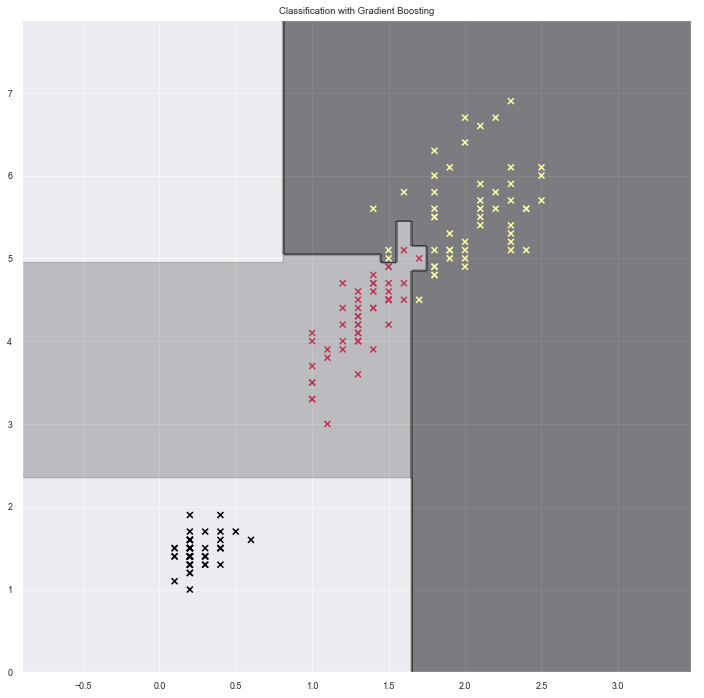

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=10, learning_rate=0.2)
gbc.fit(X_train_processed, y_train)

print('Accuracy on train:', np.mean(cross_val_score(gbc, X_train, y_train, cv=3)))
print('Accuracy on test:', np.mean(cross_val_score(gbc, X_test, y_test, cv=3)))

xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, .02),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, .02))
plane = gbc.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.contourf(xx, yy, plane, cmap='binary', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='inferno', marker='x')
plt.title('Classification with Gradient Boosting')
plt.show()

Accuracy on train: 0.9583333333333334
Accuracy on test: 0.9333333333333332


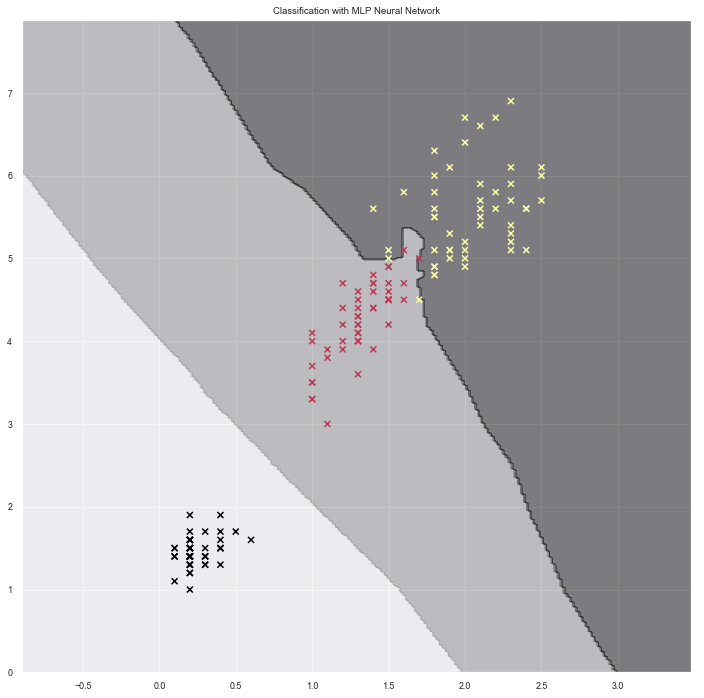

In [15]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(max_iter=1000, hidden_layer_sizes=(500,), learning_rate_init=.002)
nn.fit(X_train_processed, y_train_processed)

print('Accuracy on train:', np.mean(cross_val_score(nn, X_train_processed, y_train_processed, cv=3)))
print('Accuracy on test:', np.mean(cross_val_score(nn, X_test_processed, y_test_processed, cv=3)))

xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, .02),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, .02))
plane = decode(knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))).reshape(xx.shape)
plt.contourf(xx, yy, plane, cmap='binary', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='inferno', marker='x')
plt.title('Classification with MLP Neural Network')
plt.show()